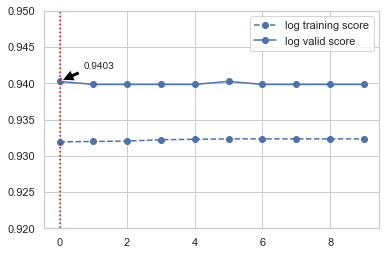

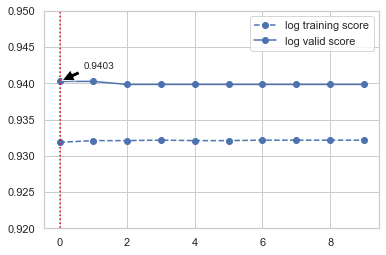

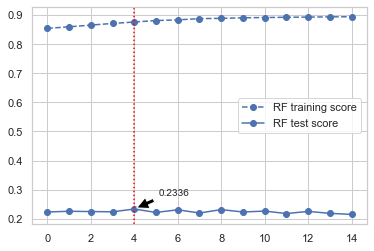

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************


In [18]:
%run Data_preprocessing.ipynb

In [19]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(multi_class='multinomial',
                        solver='lbfgs',
                        max_iter=1000,
                        C=1e10)
clf1.fit(X_train_selected_t1_norm,y_train_t1_value)
clf1.coef_

array([[-0.10279163, -0.09660385,  0.00406903,  0.17276871,  0.08915688,
        -0.03885675,  0.04173205,  0.13293168,  0.01365514,  0.02148519,
        -0.10181755,  0.03586778, -0.05839688, -0.13208474, -0.11782557,
         0.05310499, -0.35126074,  0.07398204,  0.10447742,  0.05582909,
         0.06198373,  0.01491918, -0.07447255,  0.01005475,  0.13477231,
        -0.1056851 ,  0.07278155,  0.03117762, -0.02577441, -0.06310103,
         0.049467  ,  0.03746934,  0.02361443, -0.01295121,  0.00308462,
         0.01686742, -0.02671564,  0.05577605,  0.00953968,  0.00539474,
         0.0427636 ,  0.02698893,  0.02898573,  0.12880933, -0.08705973,
        -0.02775897, -0.06681922, -0.07823475,  0.02808062, -0.09129143,
         0.04032827]])

In [20]:
print(clf1.score(X_valid_selected_t1_norm,y_valid_t1_value))

0.9411027568922306


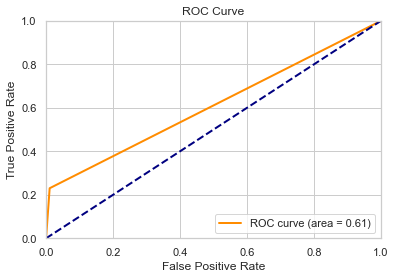

In [21]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_valid_t1_pred=clf1.predict(X_valid_selected_t1_norm)
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_t1_pred)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [22]:
from sklearn import linear_model

linear_reg2= linear_model.LinearRegression()
linear_reg2.fit(X_train_selected_t2_norm,y_train_t2_value)
linear_reg2.coef_

array([ 0.19080941, -0.02480308, -0.28925971, -0.42770476,  0.02023783,
        0.10225175, -0.07592213,  0.01629327,  0.37088999,  0.07241276,
       -0.10285905,  0.08283463,  0.10098505,  0.10287539,  0.00698289,
        0.01089153,  0.16197948,  0.01392438,  0.04211869,  0.00458311,
        0.00081505, -0.14183856,  0.11382408, -0.080565  ,  0.02376055,
        0.04833725])

In [23]:
import math
y_valid_t2_pred=linear_reg2.predict(X_valid_selected_t2_norm)
sse = np.sum((y_valid_t2_pred-y_valid_t2_value)**2)
y_valid_t2_value.shape
mse=sse/y_valid_t2_value.shape
print(math.sqrt(mse))


1.8780503878917874
